### **LensKit Introduction**
LensKit is a Python library for building, analyzing, and evaluating recommender systems. It provides a set of tools for implementing and evaluating different recommendation algorithms, as well as utilities for loading and preprocessing data.

LensKit includes a range of collaborative filtering and content-based recommendation algorithms, as well as tools for combining them to create hybrid recommenders. It also provides support for evaluating recommender performance using standard metrics like recall, precision, and nDCG.

LensKit is designed to be easy to use and flexible, with a modular architecture that allows users to easily swap in different algorithms and evaluation methods. It is well-documented and actively maintained, with a growing community of users and contributors.


We can install the library in our environment using pip and the following line of code :

### **Installing the libraries**



In [34]:
!pip install lenskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Note: We will be using the surprise library for loading Dataset.

### **Building a Recommender System**
The toolkit that will be used for evaluating the recommender system, specifically using the nDCG metric. The full form of nDCG is "Normalized Discounted Cumulative Gain", which is a measure of ranking quality that is commonly used in information retrieval and recommender systems.

The nDCG metric was developed specifically for evaluating recommendation systems, which is why it is relevant in this context. And the metric is compatible with Python DataFrames, which are a popular way of working with tabular data in Python.

The recommender system will be built using a dataset with three columns: 

Item

User

Rating

These columns represent the items that the system will recommend, the users who will receive the recommendations, and the ratings that users have given to items in the past. These three columns are the minimum required for building a collaborative filtering recommendation system, which is a common technique for building recommender systems based on past user behavior.

We will load the dataset from the scikit-surprise library and then we will continue the Data Exploration

### **Loading the Dataset**

In [36]:
import surprise
import pandas as pd
data = surprise.Dataset.load_builtin('ml-100k')
ddir = surprise.get_dataset_dir()
r_cols = ['user', 'item', 'rating', 'timestamp']
ratings = pd.read_csv(f'{ddir}/ml-100k/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

This code loads the ml-100k dataset from the surprise library, which is a popular benchmark dataset for collaborative filtering recommendation systems.

The first line imports the surprise library, which is used for building and evaluating recommendation systems. The second line imports the pandas library, which is a popular library for data manipulation and analysis in Python.

The third line loads the ml-100k dataset using the load_builtin method in the Dataset class from the surprise library. This method loads one of the built-in datasets in surprise that can be used for testing and experimentation. In this case, ml-100k is a small dataset with 100,000 ratings from 943 users on 1,682 movies.

The fourth line uses the get_dataset_dir function from surprise to get the path to the directory where the ml-100k dataset is stored.

The fifth line defines a list called r_cols that specifies the names of the columns in the u.data file that contains the ratings data.

The sixth line reads the u.data file using pandas and stores the data in a DataFrame called ratings. The sep parameter specifies that the file is tab-separated, and the names parameter specifies the column names using the r_cols list. The encoding parameter specifies the character encoding used in the file.

Overall, this code loads the ml-100k dataset into a DataFrame called ratings, which can be used for further data exploration and building a recommendation system.





We can see that we have the columns of user, item, rating and timestamp.

In [37]:
ratings.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### **Importing and Instantiating the Algorithm**


In [38]:
from lenskit.datasets import ML100K
from lenskit import batch, topn, util, topn
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
import pandas as pd
%matplotlib inline
from lenskit import topn

This code imports several modules and functions from the lenskit library, which is another library for building and evaluating recommendation systems.

The first line imports the ML100K dataset class from lenskit.datasets, which is a wrapper for the ml-100k dataset that was loaded in the previous code snippet.

The second line imports several functions and classes from lenskit, including batch, util, and topn, which are used for various tasks related to building and evaluating recommendation systems.

The third line imports the crossfold module from lenskit, which contains functions for splitting datasets into training and test sets.

The fourth and fifth lines import the Recommender class and two specific algorithms (als and item_knn) from lenskit.algorithms, which is a submodule of lenskit that contains implementations of various recommendation algorithms.

The sixth line imports the pandas library, which is used for data manipulation and analysis.

The seventh line sets up matplotlib to display plots inline.

The eighth line imports topn from lenskit, which is a submodule containing functions for computing top-N recommendations.

Overall, this code imports the necessary modules and functions to build and evaluate a recommendation system using lenskit.

In [39]:
algo_ii = knn.ItemItem(20)
algo_als = als.BiasedMF(50)

These lines of code create two recommendation algorithms using lenskit.algorithms: ItemItem and BiasedMF.

The first line creates an instance of ItemItem, which is an item-based collaborative filtering algorithm. knn stands for "k-nearest neighbors", and the ItemItem algorithm computes item-item similarity based on the k-nearest neighbors of each item. The 20 parameter specifies the number of nearest neighbors to consider for each item.

The second line creates an instance of BiasedMF, which is a matrix factorization algorithm that incorporates biases for users and items. 50 specifies the number of latent factors to use in the matrix factorization model.

These two algorithms can be used to generate recommendations for users based on their interactions with items.





We import the necessary methods and initialise two algorithms :

KNN
Biased Matrix Factorization
Now we will create a recommendation function and using the LensKit tools, we can also evaluate at the time of creation to save some memory space. To get a proper estimation, we will first generate a recommendation and then eventually evaluate it and compare it with the other algorithm.

The following code will help to generate the recommendations in a modular format and can be reused for multiple algorithms. It will take the algorithm_name, Algorithm, train and test data as the input parameters.

In [40]:
def eval(aname, algo, train, test):
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    users = test.user.unique()
    recs = batch.recommend(fittable, users, 100)
    recs['Algorithm'] = aname
    return recs

This code defines a function called eval that can be used to evaluate a recommendation algorithm. The function takes four arguments:

aname: A string representing the name of the algorithm being evaluated.

algo: An instance of a recommendation algorithm (e.g., ItemItem, BiasedMF).

train: A pandas DataFrame representing the training data, with columns user, item, and rating.

test: A pandas DataFrame representing the test data, with columns user, item, and rating.

The function first creates a copy of the algorithm using util.clone and Recommender.adapt. It then fits the algorithm to the training data using fittable.fit(train).

Next, it generates recommendations for each user in the test set using batch.recommend(fittable, users, 100), which returns a DataFrame with columns user, item, score, and rank, where rank represents the position of the item in the recommendation list.

Finally, the function adds a new column called Algorithm to the DataFrame containing the name of the algorithm being evaluated, and returns the DataFrame. This allows us to compare the performance of different algorithms using the same evaluation metric.





### **Fitting the Recommendations**
We can use the function to generate recommendations by a simple for loop which loops over the algorithms using the same dataset for a consistent scoring mechanism.

In [1]:
all_recs = []
test_data = []
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
    test_data.append(test)
    all_recs.append(eval('ItemItem', algo_ii, train, test))
    all_recs.append(eval('ALS', algo_als, train, test))

NameError: ignored

This code partitions the ratings DataFrame into 5 subsets using xf.partition_users, with each subset containing 20% of the ratings data for a randomly chosen set of users.

For each subset, it generates recommendations using the eval function defined earlier for both the ItemItem and BiasedMF algorithms, and appends the results to the all_recs list. The test_data list also keeps track of the test set for each subset, which can be used later for evaluation.

Overall, this code is generating recommendations and test sets for each partition of the ratings data, allowing us to evaluate the performance of the algorithms across multiple subsets of the data.





### **Evaluating the Recommendations**
Now we will move on to the results and compare them but first, we will merge them into one DataFrame.

In [45]:
all_recs = pd.concat(all_recs, ignore_index=True)
all_recs.head()

,item,score,user,rank,Algorithm
0,1449,4.902015,2,1,ItemItem
1,169,4.767381,2,2,ItemItem
2,483,4.749626,2,3,ItemItem
3,1191,4.737445,2,4,ItemItem
4,408,4.711972,2,5,ItemItem
...,...,...,...,...,...
95,514,4.234586,2,96,ItemItem
96,170,4.231163,2,97,ItemItem
97,520,4.231002,2,98,ItemItem
98,510,4.228546,2,99,ItemItem


We can see that their output can be added to the dataset and we have a specific score with each item and the algorithm used to recommend those values. To get better results we can concatenate all the test data together into one singular Data Frame.

This code concatenates all the recommendation DataFrames generated in the previous step into a single DataFrame using pd.concat, with ignore_index=True to reset the index of the resulting DataFrame. The resulting DataFrame all_recs contains columns for user, item, score, rank, and Algorithm, where score represents the predicted rating and rank represents the position of the item in the recommendation list.

Calling .head() on all_recs shows the first five rows of the DataFrame.





In [48]:
test_data = pd.concat(test_data, ignore_index=True)

This code concatenates all the test set DataFrames generated in the first step into a single DataFrame using pd.concat, with ignore_index=True to reset the index of the resulting DataFrame. The resulting DataFrame test_data contains columns for user, item, and rating, where rating represents the actual rating given by the user.

This step is necessary for evaluating the performance of the recommendation algorithms, as we need to compare the predicted ratings with the actual ratings in the test set.



In [49]:
test_data.head()

,user,item,rating
0,2,296,3
1,2,283,5
2,2,111,4
3,2,281,3
4,2,275,5


Now we will use a toll known as RecListAnalysis to analyse our recommendation which will help us to list all our recommendations and tests accordingly. We will use this to evaluate the nDCG values.

the normalized discounted cumulative gain (NDCG) is defined as ratio of the
discounted cumulative gain to its ideal value, which is also referred to as ideal discounted
cumulative gain (IDCG).

\begin{equation}
NDCG = \frac{DCG}{IDCG}
\end{equation}






\begin{equation}
DCG = \frac{1}{m}\sum_{u=1}^{m} \sum_{j\in I_u, v_j \leq L}
\frac{g_{uj}}{\log_2(v_j+1)} 
\end{equation}





\begin{equation}
g_{uj} = 2^{rel_{uj}-1} 
\end{equation}

 vj is the
rank of item j in the test set Iu

guj represents the utility (or gain) of the user u in consuming item j. Typically, the
value of guj is set to an exponential function of the relevance (e.g., non-negative ratings or
user hit rates)

reluj is the ground-truth relevance of item j for user u, which is computed as a
heuristic function of the ratings or hits. In many settings, the raw ratings are used. It is
common to compute the discounted cumulative gain over a recommendation list of specific
size L, rather than using all the items

ideal discounted
cumulative gain (IDCG).

The ideal discounted cumulative gain is computed by repeating the computation for DCG,
except that the ground-truth rankings are used in the computation.



In [51]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
results = rla.compute(all_recs, test_data)
results.head()

nrecs      ndcg
Algorithm user                 
ItemItem  2       100  0.062155
          3       100  0.000000
          4       100  0.000000
          5       100  0.205500
          6       100  0.334029

We have got out nDCG values in a proper DataFrame format which has been evaluated by the two algorithms and we will evaluate which algorithm has given us the best overall nDCG value

This code computes the nDCG (Normalized Discounted Cumulative Gain) metric for the recommendation lists generated by the different algorithms, using topn.RecListAnalysis().

rla.add_metric(topn.ndcg) adds the nDCG metric to the analysis. topn.ndcg is a function from the lenskit.topn module that computes the nDCG metric for a set of ranked recommendations.

rla.compute(all_recs, test_data) computes the nDCG metric for the recommendation lists generated by the different algorithms, using the all_recs DataFrame and test_data DataFrame. The resulting DataFrame results contains columns for Algorithm, user, ndcg, and nrecs, where ndcg represents the nDCG score and nrecs represents the number of recommendations for each user.

Calling .head() on results displays the first five rows of the DataFrame, showing the nDCG score and number of recommendations for each user and algorithm.





In [29]:
results.groupby('Algorithm').ndcg.mean()

Algorithm
ALS         0.136151
ItemItem    0.100473
Name: ndcg, dtype: float64

This code groups the results DataFrame by the Algorithm column and computes the mean nDCG score for each algorithm using the .ndcg.mean() function.

The result is a pandas Series object with the mean nDCG score for each algorithm. This is useful for comparing the performance of the different algorithms and selecting the best one for a given use case.

Now we will visualise our output and find the result.

<Axes: xlabel='Algorithm'>

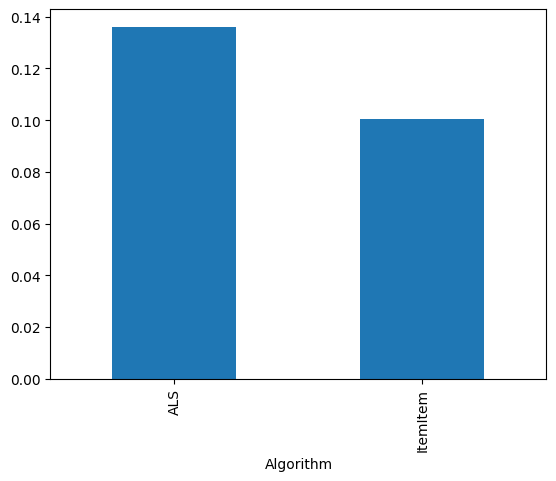

In [30]:
results.groupby('Algorithm').ndcg.mean().plot.bar()

This code creates a bar plot of the mean nDCG score for each algorithm.

The .groupby() method groups the results DataFrame by the Algorithm column, and the .ndcg.mean() function computes the mean nDCG score for each group. The resulting Series object is then plotted as a bar chart using the .plot.bar() function.

This visualization allows for easy comparison of the performance of the different algorithms in terms of their mean nDCG score.


After analysing the two algorithms, we can find out that the ALS or Alternative Least Square algorithm is having the larger nDCG value.

### **Conslusion**
So in this article, we discussed two algorithms and found out the better recommendation algorithm but this can be scaled to multiple algorithms and multiple datasets to find out the best overall algorithm or at least one algorithm which can excel over one. Feel free to do more research and tag me in future articles/code regarding this and will be more than eager to continue with this work.